In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
def decision(observations):
    
    if np.sign(observations[2]) == np.sign(observations[3]):
        #The pole is falling, correct it!
        action = int((np.sign(observations[2])+1)/2)    
    else:
        if np.sign(observations[0]) == np.sign(observations[1]):
            #The pole is not falling, but the cart is running outputs
            action = int((-np.sign(observations[3])+1)/2)
        else:
            #Everything is self correcting
            action = env.action_space.sample() #random step
            
    return action

After 10000 independent simulation
mean: 301.5291
std: 147.05889348553524
Ratio of =500: 0.2073


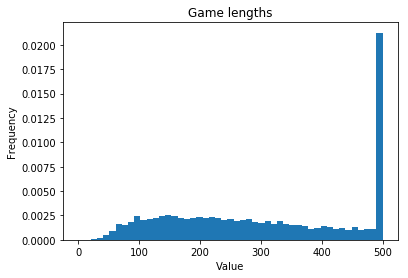

In [3]:
game_lengths = []
maxsim = 10000
for i in range(maxsim):
    done = False
    observations = env.reset()
    length = 0
    while not done:
        action = decision(observations=observations)
        observations, reward, done, info = env.step(action)
        
        length += 1
    game_lengths.append(length)

game_lengths = np.array(game_lengths)
print("After {} independent simulation\nmean: {}\nstd: {}\nRatio of =500: {}".format(maxsim, game_lengths.mean(), game_lengths.std(),
                                                                             np.sum(game_lengths == 500)/maxsim))        

bins = np.linspace(0, 500, 50)
plt.hist(game_lengths, bins, density=1)
plt.title("Game lengths")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show

done = False
observations = env.reset()
# Sample run
while not done:
    env.render()
    action = decision(observations=observations)
    observations, reward, done, info = env.step(action)